<a href="https://www.kaggle.com/code/mikedelong/everybody-loves-a-python-wordcloud?scriptVersionId=141007069" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/airplane-confidential-aviations-safety-reports/ALL_ITEMS_DATA_TABLE.csv', low_memory=False)
df.head()

,ITEM_ID,ENTITY,ENUMERATOR,ATTRIBUTE,VALUE,DISPLAY_VALUE
0,209496,Person,1,Experience.Flight Crew.Last 90 Days,180,NaN
1,209496,Person,1,Reference,1,NaN
2,209496,Person,2,Reporter Organization,Air Carrier,NaN
3,209496,Person,4,Reporter Organization,Government,NaN
4,209632,Person,2,Qualification.Flight Crew,Flight Instructor,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840247 entries, 0 to 8840246
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ITEM_ID        int64 
 1   ENTITY         object
 2   ENUMERATOR     int64 
 3   ATTRIBUTE      object
 4   VALUE          object
 5   DISPLAY_VALUE  object
dtypes: int64(2), object(4)
memory usage: 404.7+ MB


In [3]:
df.nunique()

ITEM_ID          184882
ENTITY                9
ENUMERATOR           32
ATTRIBUTE           150
VALUE            286646
DISPLAY_VALUE      2138
dtype: int64

In [4]:
# use usecols to avoid loading columns that are all NaN
text_df = pd.read_csv(filepath_or_buffer='/kaggle/input/airplane-confidential-aviations-safety-reports/TEXT_DATA_TABLE.csv',
                     usecols=['ITEM_ID', 'ENTITY', 'ENUMERATOR', 'ATTRIBUTE', 'TEXT',])
text_df.head()

,ITEM_ID,ENTITY,ENUMERATOR,ATTRIBUTE,TEXT
0,90625,Text,1,Synopsis,READ BACK CLRNC MEANT FOR A SIMILAR SOUNDING A/N.
1,90670,Text,1,Synopsis,ACR MLG OVERSHOT ALT IN CLIMB.
2,90748,Text,1,Synopsis,NON REPORTED TRAFFIC SIGHTED AND EVASIVE ACTIO...
3,90823,Text,1,Synopsis,NMAC BETWEEN MDT-ACR AND SMA. OPERATIONAL ERROR.
4,89755,Text,1,Synopsis,ACR WDB ENGINE FAILURE. INFLT SHUTDOWN.


In [5]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404258 entries, 0 to 404257
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ITEM_ID     404258 non-null  int64 
 1   ENTITY      404258 non-null  object
 2   ENUMERATOR  404258 non-null  int64 
 3   ATTRIBUTE   404258 non-null  object
 4   TEXT        404258 non-null  object
dtypes: int64(2), object(3)
memory usage: 15.4+ MB


In [6]:
df.nunique()

ITEM_ID          184882
ENTITY                9
ENUMERATOR           32
ATTRIBUTE           150
VALUE            286646
DISPLAY_VALUE      2138
dtype: int64

In [7]:
text_df['ATTRIBUTE'].value_counts()

Narrative     192403
Synopsis      184109
Diagnosis      17894
Keywords        6125
Callback        2128
Narrative2      1499
Narrative3        91
Narrative4         9
Name: ATTRIBUTE, dtype: int64

Let's make a wordcloud; let's use a sample of the data for performace purposes.

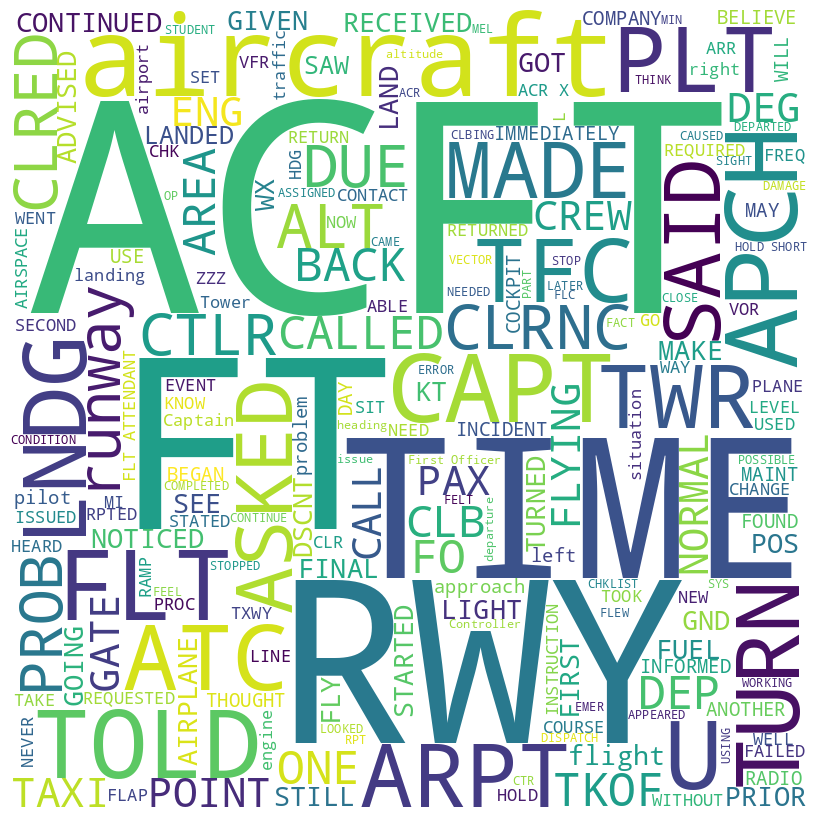

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

sample_size = 10000
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(' '.join(text_df.sample(n=sample_size)['TEXT'])) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show() 